# Assignment Customer Satisfaction and Sentiment Analysis


## Objective

You are a data analyst of a consulting company that provides customer insight regarding multiple ticketing system, such as JIRA and Zoho Desk. Your team gather surveys to customers regarding their ticketing system's performance. Your role in the team is to gather reports regarding customer satisfaction and sentiment analysis into a single dashboard and present your insight.

Analyze the following metrics and other insight you can find in the dataset:

- Survey response rate
- Customer Satisfaction score (CSAT)
- Customer Effort Score (CES)
- Net Promoter Score (NPS)
- Sentiment Analysis



## Data Preparation

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 999
pd.options.display.float_format = "{:.2f}".format

### Access to Drive

Write where you put the data in google drive.

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

# Where is your data_path
data_path = '/content/drive/My Drive/Evan_Assignment_DayEC5/'

Mounted at /content/drive/


### Read Data

Read the file **assignment_ticket_system_review.csv**

In [3]:
# Read Data
df = pd.read_csv(data_path + 'assignment_ticket_system_review.csv')

df.head()

,id_survey,date_of_survey,ticket_system,overall_rating,customer_service,features,value_for_money,ease_of_use,likelihood_to_recommend,overall_text
0,T_02161,2024-11-20,Zendesk,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,T_00229,2024-10-06,Zendesk,3.00,4.00,3.00,3.00,2.00,6.00,Customer tickets managements
2,T_04527,2024-12-26,Zoho Desk,5.00,5.00,5.00,5.00,5.00,8.00,"After 6 months of using the Zoho desk, we shif..."
3,T_03190,2024-12-08,Zoho Desk,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,T_00644,2024-10-17,Zendesk,5.00,3.00,4.00,5.00,5.00,6.00,Pros:Zendesk has always been one of the go-to ...


The following is the dictionary for the data, survey is only valid if all of the survey questions and text review is not blank (null):

**General Information**
- id_survey: identifier for each survey
- date_of_survey: date of survey taken
- ticket_system: The name of the ticket system being reviewed (e.g. Zoho Desk)

**Survey Questions**
- overall_rating: The overall satisfaction rating given by the reviewer, ranging from 1 to 5
- customer_service: The satisfaction rating for the customer service provided by the ticket system, ranging from 1 to 5.
- features: The satisfaction rating for the features of the ticket system, ranging from 1 to 5
- value_for_money: The satisfaction rating for the value for money provided by the ticket system, ranging from 1 to 5
- ease_of_use: The rating for how easy the ticket system is to use, ranging from 1 to 5
- likelihood_to_recommend: The likelihood that the reviewer would recommend the ticket system to others, ranging from 1 to 10
- overall_text: The full text of the overall review, providing detailed feedback on the ticket system.


In [4]:
# Check the type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_survey                1462 non-null   object 
 1   date_of_survey           1462 non-null   object 
 2   ticket_system            1462 non-null   object 
 3   overall_rating           787 non-null    float64
 4   customer_service         787 non-null    float64
 5   features                 787 non-null    float64
 6   value_for_money          787 non-null    float64
 7   ease_of_use              787 non-null    float64
 8   likelihood_to_recommend  787 non-null    float64
 9   overall_text             787 non-null    object 
dtypes: float64(6), object(4)
memory usage: 114.3+ KB


### Data Cleansing

Convert the date column into proper date_time format.

In [5]:
# Convert data type
df['date_of_survey'] = pd.to_datetime(df['date_of_survey'])

df.head()

,id_survey,date_of_survey,ticket_system,overall_rating,customer_service,features,value_for_money,ease_of_use,likelihood_to_recommend,overall_text
0,T_02161,2024-11-20,Zendesk,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,T_00229,2024-10-06,Zendesk,3.00,4.00,3.00,3.00,2.00,6.00,Customer tickets managements
2,T_04527,2024-12-26,Zoho Desk,5.00,5.00,5.00,5.00,5.00,8.00,"After 6 months of using the Zoho desk, we shif..."
3,T_03190,2024-12-08,Zoho Desk,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,T_00644,2024-10-17,Zendesk,5.00,3.00,4.00,5.00,5.00,6.00,Pros:Zendesk has always been one of the go-to ...


## Survey Analysis

### Response Rate

Start by analyzing how many customers has filled the survey, indicated by whether the overall_rating is not blank.

In [6]:
df.columns

Index(['id_survey', 'date_of_survey', 'ticket_system', 'overall_rating',
       'customer_service', 'features', 'value_for_money', 'ease_of_use',
       'likelihood_to_recommend', 'overall_text'],
      dtype='object')

In [7]:
# How many customer responded to the survey?
df['fill_survey'] = np.where(df['overall_rating'].isnull(), 'Not Responded', 'Responded')

df.value_counts('fill_survey', normalize=True).reset_index()

,fill_survey,proportion
0,Responded,0.54
1,Not Responded,0.46


Alternatively, you can also

In [8]:
# Label each row based on whether 'overall_rating' is filled
df['fill_survey'] = np.where(df['overall_rating'].notna(), 'Responded', 'Not Responded')

# Count how many responded vs not responded (can include normalize=True for ratio)
response_summary = df['fill_survey'].value_counts(normalize=False).reset_index()
response_summary.columns = ['Response Status', 'Count']

# If you also want percentage:
response_summary['Percentage'] = (response_summary['Count'] / response_summary['Count'].sum()) * 100

response_summary

,Response Status,Count,Percentage
0,Responded,787,53.83
1,Not Responded,675,46.17


In [9]:
df['overall_rating'].notna().sum()  # Total number of respondents
df['overall_rating'].isna().value_counts() # Check both by boolean/binary

,count
overall_rating,
False,787
True,675


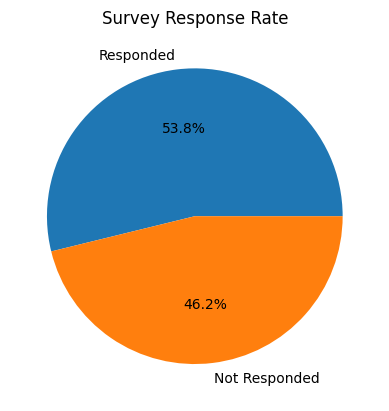

In [10]:
df['fill_survey'].value_counts().plot(kind='pie', autopct='%1.1f%%', ylabel='', title='Survey Response Rate')
plt.show()

Create a new dataframe that consists only of those who have responded the survey to simplify calculating the CSAT, CES, and NPS Score.

In [11]:
# Responded Customer
responded_customer = df[df['fill_survey'] == 'Responded'].copy()

responded_customer

,id_survey,date_of_survey,ticket_system,overall_rating,customer_service,features,value_for_money,ease_of_use,likelihood_to_recommend,overall_text,fill_survey
1,T_00229,2024-10-06,Zendesk,3.00,4.00,3.00,3.00,2.00,6.00,Customer tickets managements,Responded
2,T_04527,2024-12-26,Zoho Desk,5.00,5.00,5.00,5.00,5.00,8.00,"After 6 months of using the Zoho desk, we shif...",Responded
4,T_00644,2024-10-17,Zendesk,5.00,3.00,4.00,5.00,5.00,6.00,Pros:Zendesk has always been one of the go-to ...,Responded
6,T_04682,2024-12-28,Zoho Desk,5.00,4.00,5.00,5.00,5.00,8.00,It has been very useful so far to integrate mu...,Responded
8,T_01238,2024-11-02,Freshdesk,4.00,4.00,4.00,5.00,4.00,8.00,Pros:It's easy to use and very intuitive.We ha...,Responded
...,...,...,...,...,...,...,...,...,...,...,...
1457,T_01536,2024-11-08,Freshdesk,5.00,4.00,4.00,5.00,5.00,8.00,"IT was not prioritizing, tracking, resolving a...",Responded
1458,T_00582,2024-10-15,Jira Service Management,4.00,3.00,3.00,4.00,4.00,5.00,"Very useful, one-stop solution with related to...",Responded
1459,T_01834,2024-11-14,Zendesk,5.00,4.00,5.00,5.00,5.00,10.00,We have done quite well. We have already more ...,Responded
1460,T_03629,2024-12-13,Zendesk,5.00,3.00,5.00,5.00,4.00,7.00,"Immensely positive, highly recommended custome...",Responded


### CSAT Score

Measure the customer's overall satisfaction score (CSAT) with the following formula:

$$
CSAT = \frac{\Sigma\ total\ satisfaction\ score}{number\ of\ responded\ customer \times \max\ rating}
$$

The max rating is inserted to convert the CSAT score into percentage.

CSAT score can be classified into categories based on the result. There is no absolute threshold for each categories but the following is the common threshold:

- \>= 90%: Excellent
- 75%-90%: Good
- 60-75%: Fair
- \<60%: Poor

In [12]:
df.columns

Index(['id_survey', 'date_of_survey', 'ticket_system', 'overall_rating',
       'customer_service', 'features', 'value_for_money', 'ease_of_use',
       'likelihood_to_recommend', 'overall_text', 'fill_survey'],
      dtype='object')

In [13]:
max_rating = df['overall_rating'].max()
max_rating

5.0

In [14]:
# CSAT Score
n_data = responded_customer.shape[0] * max_rating
csat_score = responded_customer['overall_rating'].sum() / n_data
print(f'Overall CSAT Score: { (csat_score * 100):.1f}%')

Overall CSAT Score: 91.2%


Measure the satisfaction score for the following attributes:

- customer service
- features
- value for money

In [15]:
responded_customer.columns

Index(['id_survey', 'date_of_survey', 'ticket_system', 'overall_rating',
       'customer_service', 'features', 'value_for_money', 'ease_of_use',
       'likelihood_to_recommend', 'overall_text', 'fill_survey'],
      dtype='object')

In [16]:
# Satisfaction Score for Attributes
score_customer_service = responded_customer['customer_service'].sum() / n_data
score_features = responded_customer['features'].sum() / n_data
score_value_for_money = responded_customer['value_for_money'].sum() / n_data

print(f'Overall CSAT Score: { (csat_score * 100):.1f}%')
print(f'Customer Service Score: { (score_customer_service * 100):.1f}%')
print(f'Features Score: { (score_features * 100):.1f}%')
print(f'Value for Money Score: { (score_value_for_money * 100):.1f}%')

Overall CSAT Score: 91.2%
Customer Service Score: 67.3%
Features Score: 88.3%
Value for Money Score: 87.6%


### CES Score

Measure CES with the following formula


$$
CES = \frac{\Sigma\ total\ effort\ score}{number\ of\ responded\ customer \times \max\ rating}
$$

In [17]:
responded_customer['ease_of_use'].value_counts()

,count
ease_of_use,
5.00,466
4.00,246
3.00,60
2.00,12
1.00,3


In [44]:
responded_customer['likelihood_to_recommend'].value_counts()

,count
likelihood_to_recommend,
8.00,224
9.00,174
7.00,155
6.00,82
10.00,77
5.00,34
4.00,18
3.00,10
2.00,5


In [18]:
# CES Score
ces_ease_of_use = responded_customer['ease_of_use'].sum() / n_data
print(f'Ease of Use Score: { (ces_ease_of_use * 100):.1f}%')

Ease of Use Score: 89.5%


### NPS Score

To calculate the NPS score, first we must convert the **would_you_recommend** column into proper NPS Category based on the rating value:

* Promoter: Rating 9-10
* Passive: Rating 7-8
* Detractor: Rating < 7

In [19]:
responded_customer.columns

Index(['id_survey', 'date_of_survey', 'ticket_system', 'overall_rating',
       'customer_service', 'features', 'value_for_money', 'ease_of_use',
       'likelihood_to_recommend', 'overall_text', 'fill_survey'],
      dtype='object')

In [20]:
# Category NPS
nps_value = ['Promoter', 'Passive', 'Detractor']
nps_condition = [responded_customer['likelihood_to_recommend'] >= 9,
                 (responded_customer['likelihood_to_recommend'] >= 7) & (responded_customer['likelihood_to_recommend'] < 9),
                 responded_customer['likelihood_to_recommend'] < 7
                 ]

responded_customer['nps_category'] = np.select(nps_condition, nps_value, default='Unknown')

responded_customer.value_counts('nps_category', normalize = True)

,proportion
nps_category,
Passive,0.48
Promoter,0.32
Detractor,0.20



Calculate the NPS Score with the following formula

$$
NPS = \frac{Promoter - Detractor}{Total\ Survey\ Responded}
$$

In [21]:
# NPS Score
nps_agg_1 = responded_customer.value_counts('nps_category').reset_index()

nps_agg_promoter = nps_agg_1[ nps_agg_1['nps_category'] == 'Promoter' ]['count'].item()
nps_agg_detractor = nps_agg_1[ nps_agg_1['nps_category'] == 'Detractor' ]['count'].item()
nps_score = (nps_agg_promoter - nps_agg_detractor)/nps_agg_1['count'].sum()

print(f'NPS Score: { (nps_score * 100):.1f}')

NPS Score: 11.9


NPS score can be ranging from -100 (when all customers are detractor) to 100 (when all customers are promoter).

NPS Score can be classified into categories based on the following threshold:

- \>= 70: Excellent
- 50-69: Very Good
- 30-49: Good
- 0-29: Average
- \< 0: Poor

Turns out for this dataset, NPS score is average.

## Sentiment Analysis

Create a new dataframe with no blank overall_text. `responded_customer` fulfills this requirement, since it contains 787 rows and 787 unique values.

In [45]:
responded_customer.head()

,id_survey,date_of_survey,ticket_system,overall_rating,customer_service,features,value_for_money,ease_of_use,likelihood_to_recommend,overall_text,fill_survey,nps_category
1,T_00229,2024-10-06,Zendesk,3.00,4.00,3.00,3.00,2.00,6.00,Customer tickets managements,Responded,Detractor
2,T_04527,2024-12-26,Zoho Desk,5.00,5.00,5.00,5.00,5.00,8.00,"After 6 months of using the Zoho desk, we shif...",Responded,Passive
4,T_00644,2024-10-17,Zendesk,5.00,3.00,4.00,5.00,5.00,6.00,Pros:Zendesk has always been one of the go-to ...,Responded,Detractor
6,T_04682,2024-12-28,Zoho Desk,5.00,4.00,5.00,5.00,5.00,8.00,It has been very useful so far to integrate mu...,Responded,Passive
8,T_01238,2024-11-02,Freshdesk,4.00,4.00,4.00,5.00,4.00,8.00,Pros:It's easy to use and very intuitive.We ha...,Responded,Passive


In [23]:
df = df.merge(responded_customer[['id_survey', 'nps_category']], on = 'id_survey', how = 'left')

df.head()

,id_survey,date_of_survey,ticket_system,overall_rating,customer_service,features,value_for_money,ease_of_use,likelihood_to_recommend,overall_text,fill_survey,nps_category
0,T_02161,2024-11-20,Zendesk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Responded,NaN
1,T_00229,2024-10-06,Zendesk,3.00,4.00,3.00,3.00,2.00,6.00,Customer tickets managements,Responded,Detractor
2,T_04527,2024-12-26,Zoho Desk,5.00,5.00,5.00,5.00,5.00,8.00,"After 6 months of using the Zoho desk, we shif...",Responded,Passive
3,T_03190,2024-12-08,Zoho Desk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Responded,NaN
4,T_00644,2024-10-17,Zendesk,5.00,3.00,4.00,5.00,5.00,6.00,Pros:Zendesk has always been one of the go-to ...,Responded,Detractor


In [24]:
# Create new dataframe
df_clean = df.dropna(axis=0, subset = 'overall_text')[['id_survey', 'overall_text']].copy()

df_clean.head()

,id_survey,overall_text
1,T_00229,Customer tickets managements
2,T_04527,"After 6 months of using the Zoho desk, we shif..."
4,T_00644,Pros:Zendesk has always been one of the go-to ...
6,T_04682,It has been very useful so far to integrate mu...
8,T_01238,Pros:It's easy to use and very intuitive.We ha...


### Text Cleansing

In order to get more accurate sentiment, several text cleansing need to be done. However, in most of recent sentiment analysis models and algorithm, the only text cleansing needed are as follows:

* Clean double whitespace
* Clean URL/website
* Clean username (mostly in social media or digital text)

In [25]:
import re

def cleansing_text(x):
  # clean double whitespace
  out_text = ' '.join(x.split())

  # clean url
  out_text = re.sub(r"http\S+|www\S+|https\S+", 'http', out_text)

  # clean username
  out_text = re.sub(r"@\S+", '@user', out_text)

  return(out_text)

cleansing_text(" Doesn't  dissapoint. The car       was great. It was the best car rental experiences I've had! Salute to @jone who recommend https:/rental.com")

"Doesn't dissapoint. The car was great. It was the best car rental experiences I've had! Salute to @user who recommend http"

In [26]:
# apply cleansing to review
df_clean['clean_text'] = df_clean['overall_text'].apply(cleansing_text)

df_clean.tail()

,id_survey,overall_text,clean_text
1457,T_01536,"IT was not prioritizing, tracking, resolving a...","IT was not prioritizing, tracking, resolving a..."
1458,T_00582,"Very useful, one-stop solution with related to...","Very useful, one-stop solution with related to..."
1459,T_01834,We have done quite well. We have already more ...,We have done quite well. We have already more ...
1460,T_03629,"Immensely positive, highly recommended custome...","Immensely positive, highly recommended custome..."
1461,T_01981,Pros:Easy to start with a basic free setup and...,Pros:Easy to start with a basic free setup and...


In [27]:
(df_clean['clean_text'] != df_clean['overall_text']).sum()
df_clean[df_clean['clean_text'] != df_clean['overall_text']][['overall_text', 'clean_text']].head()

,overall_text,clean_text


In [28]:
df.head()

,id_survey,date_of_survey,ticket_system,overall_rating,customer_service,features,value_for_money,ease_of_use,likelihood_to_recommend,overall_text,fill_survey,nps_category
0,T_02161,2024-11-20,Zendesk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Responded,NaN
1,T_00229,2024-10-06,Zendesk,3.00,4.00,3.00,3.00,2.00,6.00,Customer tickets managements,Responded,Detractor
2,T_04527,2024-12-26,Zoho Desk,5.00,5.00,5.00,5.00,5.00,8.00,"After 6 months of using the Zoho desk, we shif...",Responded,Passive
3,T_03190,2024-12-08,Zoho Desk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Responded,NaN
4,T_00644,2024-10-17,Zendesk,5.00,3.00,4.00,5.00,5.00,6.00,Pros:Zendesk has always been one of the go-to ...,Responded,Detractor


### Sentiment Analysis

Create a sentiment categories using algorithm of your own choice.

In [29]:
# Sentiment Algorithm
%%capture
!pip install transformers

from transformers import pipeline
import numpy as np

# Load model
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")

Check the number of data by sentiment.

In [30]:
%%time
# Filter clean text
df_clean = df[df['overall_text'].notna() & (df['overall_text'].str.strip() != "")].copy()

# Predict sentiment
results = sentiment_pipeline(df_clean['overall_text'].tolist(), batch_size=32)

# Add prediction columns
df_clean['sentiment_raw'] = [res['label'] for res in results]

# Map label to sentiment category
label_map = {
    'LABEL_0': 'Negative',
    'LABEL_1': 'Neutral',
    'LABEL_2': 'Positive'
}
df_clean['sentiment'] = df_clean['sentiment_raw'].map(label_map)

df_clean[['id_survey', 'overall_text', 'sentiment']].head()

CPU times: user 3.15 s, sys: 948 ms, total: 4.1 s
Wall time: 7.06 s


,id_survey,overall_text,sentiment
1,T_00229,Customer tickets managements,Neutral
2,T_04527,"After 6 months of using the Zoho desk, we shif...",Positive
4,T_00644,Pros:Zendesk has always been one of the go-to ...,Positive
6,T_04682,It has been very useful so far to integrate mu...,Positive
8,T_01238,Pros:It's easy to use and very intuitive.We ha...,Positive


In [36]:
# Number of Sentiment
df_clean.value_counts('sentiment', normalize=True)

,proportion
sentiment,
Positive,0.85
Neutral,0.13
Negative,0.03


In [37]:
df_clean[df_clean['sentiment'] == 'Negative'][['id_survey', 'overall_text', 'sentiment']].head(10)

,id_survey,overall_text,sentiment
100,T_01233,The software solves a real business need. It's...,Negative
139,T_00227,"we use zendesk daily for our ticketing needs, ...",Negative
203,T_02922,"I would never, under any circumstances, ever s...",Negative
245,T_04207,I would not recommend Zendesk unless you work ...,Negative
338,T_01429,"Overall, the experience and usage is exemplary...",Negative
467,T_03059,"Missing emails, certain thread histories that ...",Negative
573,T_02538,We use service now every time a change request...,Negative
741,T_02791,Too many !!,Negative
761,T_01836,The only reason I am using zendesk is because ...,Negative
816,T_02054,"Good tool, but a bit pricey, and support is me...",Negative


In [46]:
df_clean.head()

,id_survey,date_of_survey,ticket_system,overall_rating,customer_service,features,value_for_money,ease_of_use,likelihood_to_recommend,overall_text,fill_survey,nps_category,sentiment_raw,sentiment
1,T_00229,2024-10-06,Zendesk,3.00,4.00,3.00,3.00,2.00,6.00,Customer tickets managements,Responded,Detractor,LABEL_1,Neutral
2,T_04527,2024-12-26,Zoho Desk,5.00,5.00,5.00,5.00,5.00,8.00,"After 6 months of using the Zoho desk, we shif...",Responded,Passive,LABEL_2,Positive
4,T_00644,2024-10-17,Zendesk,5.00,3.00,4.00,5.00,5.00,6.00,Pros:Zendesk has always been one of the go-to ...,Responded,Detractor,LABEL_2,Positive
6,T_04682,2024-12-28,Zoho Desk,5.00,4.00,5.00,5.00,5.00,8.00,It has been very useful so far to integrate mu...,Responded,Passive,LABEL_2,Positive
8,T_01238,2024-11-02,Freshdesk,4.00,4.00,4.00,5.00,4.00,8.00,Pros:It's easy to use and very intuitive.We ha...,Responded,Passive,LABEL_2,Positive


## Finalize Data for Reporting

Save the review data with NPS category and sentiment information to new csv for the dashboard.

In [38]:
# Save Data
df_final = df.merge(df_clean[['id_survey', 'sentiment']], on = 'id_survey', how = 'left')
df_final

,id_survey,date_of_survey,ticket_system,overall_rating,customer_service,features,value_for_money,ease_of_use,likelihood_to_recommend,overall_text,fill_survey,nps_category,sentiment
0,T_02161,2024-11-20,Zendesk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Responded,NaN,NaN
1,T_00229,2024-10-06,Zendesk,3.00,4.00,3.00,3.00,2.00,6.00,Customer tickets managements,Responded,Detractor,Neutral
2,T_04527,2024-12-26,Zoho Desk,5.00,5.00,5.00,5.00,5.00,8.00,"After 6 months of using the Zoho desk, we shif...",Responded,Passive,Positive
3,T_03190,2024-12-08,Zoho Desk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Responded,NaN,NaN
4,T_00644,2024-10-17,Zendesk,5.00,3.00,4.00,5.00,5.00,6.00,Pros:Zendesk has always been one of the go-to ...,Responded,Detractor,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,T_01536,2024-11-08,Freshdesk,5.00,4.00,4.00,5.00,5.00,8.00,"IT was not prioritizing, tracking, resolving a...",Responded,Passive,Neutral
1458,T_00582,2024-10-15,Jira Service Management,4.00,3.00,3.00,4.00,4.00,5.00,"Very useful, one-stop solution with related to...",Responded,Detractor,Positive
1459,T_01834,2024-11-14,Zendesk,5.00,4.00,5.00,5.00,5.00,10.00,We have done quite well. We have already more ...,Responded,Promoter,Positive
1460,T_03629,2024-12-13,Zendesk,5.00,3.00,5.00,5.00,4.00,7.00,"Immensely positive, highly recommended custome...",Responded,Passive,Positive


In [50]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 787 entries, 1 to 1461
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id_survey                787 non-null    object        
 1   date_of_survey           787 non-null    datetime64[ns]
 2   ticket_system            787 non-null    object        
 3   overall_rating           787 non-null    float64       
 4   customer_service         787 non-null    float64       
 5   features                 787 non-null    float64       
 6   value_for_money          787 non-null    float64       
 7   ease_of_use              787 non-null    float64       
 8   likelihood_to_recommend  787 non-null    float64       
 9   overall_text             787 non-null    object        
 10  fill_survey              787 non-null    object        
 11  nps_category             787 non-null    object        
 12  sentiment_raw            787 non-null   

In [51]:
df_clean['sentiment_raw'].value_counts()

,count
sentiment_raw,
LABEL_2,667
LABEL_1,100
LABEL_0,20


In [56]:
output = data_path + 'cleaned_data.xlsx'

df_clean.to_excel(output, index = False)

In [57]:
file_output = data_path + 'full_data.xlsx'

df_final.to_excel(file_output, index = False)

In [58]:
responded_customer.to_excel(data_path + "data_responded.xlsx", index=False, float_format="%.2f")